Les utilisateurs de AT&T sont constamment exposé aux SPAMS messages et veulent automatiser la detection des SPAMS

On va pouvoir implémenter un modèle de deep learning tel que des NLP, en faisant du word embedding ou encore essayer le modèle BERT


In [1]:


import pandas as pd
import numpy as np

import tensorflow as tf


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe(include="all")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
(df.isnull().sum()/df.shape[0]) * 100

,0
v1,0.000000
v2,0.000000
Unnamed: 2,99.102656
Unnamed: 3,99.784637
Unnamed: 4,99.892319


In [8]:
df.loc[df["Unnamed: 2"].notnull(), :] # filtre sur la colonne Unnamed: 2, sortant toutes les lignes qui ne sont pas nulles

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


On se rend bien compte que même malgré le haut pourcentage de valeurs manquantes dans notre dataset, nous avons quand même des valeurs à exploiter


L'idée est donc de rassembler le texte présent dans les colonnes v2 à Unnamed: 4 dans une seule et même colonne que l'on appellera "Text" et pour celles qui contiennent des NaN, on va les remplacer par une chaîne de caractère vide

In [9]:
def concat_text (row, column): #on définit une fonction prenant en argument une ligne de df, représentée par une séries, ainsi qu'une liste contenant des noms de colonnes
  values = [str(row[col]) if not pd.isna(row[col]) else '' for col in column] # on convertit la valeur dans la colonne en chaine de caractère si et seulement si la valeur n'est pas manquante
                                                                              # si on a un NaN, on retourne une chaine vide ''
  return ' '.join([i for i in values if i]) # on itère sur tous les éléments de la liste "values" et on concerne que les éléments non vides, et on fait un join

text_columns = ['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df['Text'] = df.apply(lambda row: concat_text(row, text_columns), axis = 1) # création d'une nouvelle colonne "Text" en appliquant la fonction concat_text à chaque ligne
                                                                            # des colonnes mentionnée dans la liste "text_columns"



In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['Text'][3525]

'\\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEAD 2 DA WRLD. BEEN SLEEPING ON DA SOFA ALL DAY  HAD A COOL NYTHO  TX 4 FONIN HON  CALL 2MWEN IM BK FRMCLOUD 9! J X\\""'

In [12]:
df['v2'][3525]

'\\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEAD 2 DA WRLD. BEEN SLEEPING ON DA SOFA ALL DAY'

On voit bien que notre fonction a bien fonctionné car on voit bien que dans la colonne "Text" on a notre texte concaténé.
On peut donc supprimer les colonnes v2, Unnamed: 2/3/4

In [13]:
df = df.drop(['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [14]:
df.head()

,v1,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.rename(columns={'v1':'labels'}, inplace="True") # on renomme la colonne v1 en "labels"

In [16]:
df.head()

,labels,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###Cleaning des données textuelles

In [17]:
import spacy
# Import english stop words
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# Preprocess text
def preprocess_text(text):
    cleaned_text = text
    cleaned_text = ''.join(ch for ch in cleaned_text if ch.isalnum() or ch==" ")
    # On retire les doubles espaces
    cleaned_text = cleaned_text.replace(" +"," ")
    doc = nlp(cleaned_text.strip())  # on retire les espaces de fin et de début
    lemmatized_text = " ".join([token.lemma_ for token in doc if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]) # on lématize pour convertir tout type de mot en son mode racine

    return lemmatized_text.lower()  # return lowercase lemmatized text

In [18]:
df['text_cleaned'] = df['Text'].apply(preprocess_text)
df.head()

,labels,Text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i think usf live


On remplace les valeurs de "Ham" et "Spam" par : "Ham" = 0 et "Spam" = 1

In [19]:
df['labels'] = df['labels'].replace({"ham":0, "spam":1})
df.head()

/tmp/ipython-input-19-449366155.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['labels'] = df['labels'].replace({"ham":0, "spam":1})


,labels,Text,text_cleaned
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i think usf live


A présent, maintenant que nous avons une colonne avec nos messages nettoyés et mis en forme, nous allons encoder les messages avec keras tokenizer pour affecter une valeur à chaque mot

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

NUM_WORDS = 5000

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token='oov')
tokenizer.fit_on_texts(df['text_cleaned'])
df['text_encoded'] = tokenizer.texts_to_sequences(df['text_cleaned'])
df.head()



,labels,Text,text_cleaned,text_encoded
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[3708, 266, 451, 466, 948, 36, 53, 205, 949, 8..."
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[11, 196, 3710, 291, 3, 1483]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[13, 301, 4, 536, 669, 45, 1484, 858, 428, 148..."
3,0,U dun say so early hor... U c already then say...,u dun early hor u c,"[3, 128, 153, 2416, 3, 85]"
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i think usf live,"[715, 2, 24, 670, 132]"


Une fois que l'on a nos messages encodés/tokénisés, ils faut faire le padding car tensorflow est incapable de faire des tensors à partir de listes. Il faut "stocker" nos messages encodés à l'intérieur d'un seul numpy array avant de crééer un dataset tensorflow. Pour cela il faut faire le padding pour que nos séquences de texte encodés soient de la même longueur en rajoutant des 0 à la séquence. Cela garantit que chaque phrase en entrée du modèle soit de même longueur

In [21]:
padded = tf.keras.preprocessing.sequence.pad_sequences(df.text_encoded, maxlen=None, padding='post')

In [22]:
from sklearn.model_selection import train_test_split

# Train Test Split
xtrain, xval, ytrain, yval = train_test_split(padded,df['labels'], test_size=0.3, stratify=df.labels) #on stratify car problème de classification



In [23]:
#création des tensors dataset
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [24]:
#regardons un batch
for text, labels in train_batch.take(1):
  print(text, labels)

tf.Tensor(
[[   8    1   31 ...    0    0    0]
 [   1  459 3503 ...    0    0    0]
 [ 616  900 3609 ...    0    0    0]
 ...
 [2526    0    0 ...    0    0    0]
 [ 948  355  757 ...    0    0    0]
 [4083  241 1159 ...    0    0    0]], shape=(64, 73), dtype=int32) tf.Tensor(
[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(64,), dtype=int64)


Modèle Baseline

In [25]:
padded.shape

(5572, 73)

In [26]:
# modèle d'embedding classique

vocab_size = NUM_WORDS
model = tf.keras.Sequential([
                  # Layer od Input word embedding
                  tf.keras.layers.Embedding(vocab_size+1, 8, input_shape=(padded.shape[1],),name="embedding"),
                  # the input dim needs to be equal to the size of the vocabulary + 1 (because of
                  # the zero padding)

                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),# this will pick the average for every word in the sentence
                  # along each dimension of the representation space.


                  # Layer Dense classique
                  tf.keras.layers.Dense(16, activation='relu'),

                  # Layer of output with the number of neurons on output equal to the number of class with linear function
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 8)             40008     
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 40169 (156.91 KB)
Trainable params: 40169 (156.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
optimizer = tf.keras.optimizers.Adam()
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
    )

In [29]:
baseline = model.fit(train_batch,
                    epochs=100,
                     validation_data=val_batch)

Epoch 1/100
61/61 [==============================] - 1s 6ms/step - loss: 0.6294 - binary_accuracy: 0.8597 - recall: 0.0191 - precision: 0.2273 - val_loss: 0.5596 - val_binary_accuracy: 0.8660 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.4860 - binary_accuracy: 0.8659 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4193 - val_binary_accuracy: 0.8660 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.3841 - binary_accuracy: 0.8659 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3647 - val_binary_accuracy: 0.8660 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3557 - binary_accuracy: 0.8659 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3531 - val_binary_accuracy: 0.8660 - val_recall: 0.0000e+00 - val_precision: 0.0000e

In [30]:
results = model.evaluate(val_batch, verbose=1, return_dict=True)
results


27/27 [==============================] - 0s 1ms/step - loss: 0.0864 - binary_accuracy: 0.9821 - recall: 0.8795 - precision: 0.9850


{'loss': 0.08636206388473511,
 'binary_accuracy': 0.9820573925971985,
 'recall': 0.8794642686843872,
 'precision': 0.9850000143051147}

On remarque des résultats très satisfaisants déjà avec ce simple modèle
Pour rappel:
- accuracy = pourcentage de prédictions correctes
- Recall = % de valeur positive correctement prédites
- Precision = % de prédictions positives correctes
- Loss = une binary cross entropy basse veut dire que les prédictions sont bonnes. Là on a 0.08 ce qui est très bon


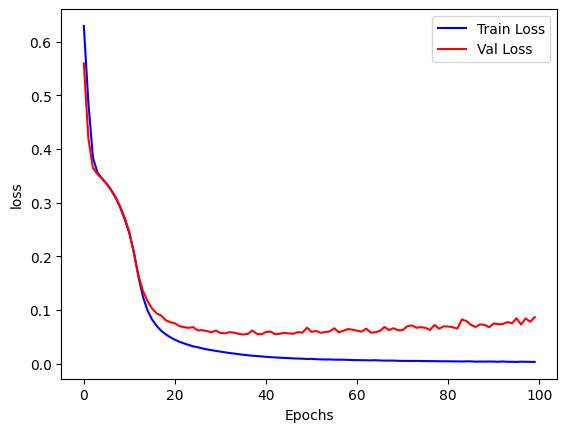

In [31]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(baseline.history["loss"], color="b", label="Train Loss")
plt.plot(baseline.history["val_loss"], color="r", label="Val Loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

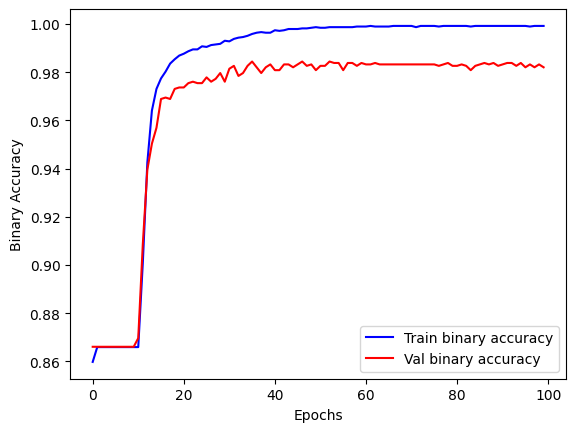

In [32]:
# Visualization of the training process on the accuracy
plt.plot(baseline.history["binary_accuracy"], color="b", label="Train binary accuracy")
plt.plot(baseline.history["val_binary_accuracy"], color="r", label="Val binary accuracy")
plt.ylabel("Binary Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

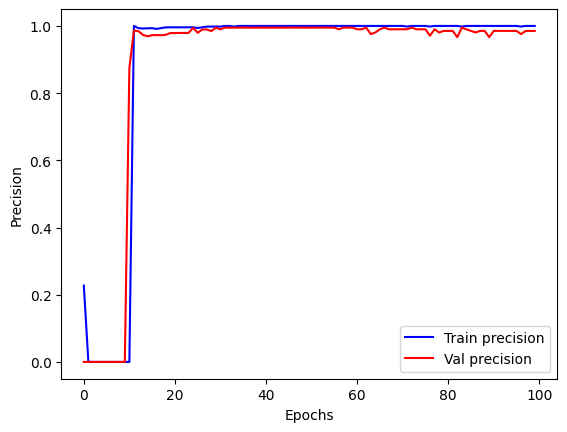

In [33]:
# Visualization of the training process on the precision
plt.plot(baseline.history["precision"], color="b", label="Train precision")
plt.plot(baseline.history["val_precision"], color="r", label="Val precision")
plt.ylabel("Precision")
plt.xlabel("Epochs")
plt.legend()
plt.show()

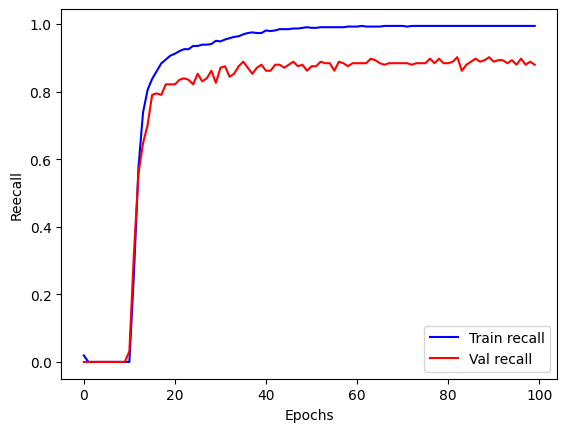

In [34]:
# Visualization of the training process on the recall
plt.plot(baseline.history["recall"], color="b", label="Train recall")
plt.plot(baseline.history["val_recall"], color="r", label="Val recall")
plt.ylabel("Reecall")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [35]:
tf.__version__

'2.15.1'

Transfert learning avec un modèle plus performant voir si les perfomances s'améliorent

In [36]:
!pip install -U "tensorflow-text==2.15.*"
!pip install -U "tf-models-official==2.15.*"

In [37]:
X_train, X_val, y_train, y_val = train_test_split(df['text_cleaned'],df['labels'], stratify=df['labels'], test_size=0.3)

train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).prefetch(tf.data.AUTOTUNE)
val = tf.data.Dataset.from_tensor_slices((X_val, y_val)).prefetch(tf.data.AUTOTUNE)

train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [38]:
import tensorflow_hub as hub
import tensorflow_text

def create_bert_model():

  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') #couche d'entrée acceptant du texte brut de longueur variable


  # Charge le preprocesseur de BERT, produit des tokens prêts pour BERT
  preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")
  # Charge le modèle BERT pré-entrainé en restant figé pour entraîner que les couches ajoutées
  encoder_inputs = preprocessor(text_input) #tokenisation du texte
  encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-8-h-512-a-8/2", trainable=False)

  # Pipeline

  outputs = encoder(encoder_inputs)
  pooled_output = outputs["pooled_output"] #[batch_size, 768]
  sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]

  out = tf.keras.layers.Dropout(0.2)(pooled_output) #Evite le sur-apprentissage
  out = tf.keras.layers.Dense(16, activation='relu')(out) #16 neurones avec fonction d'activation ReLu
  out = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(out) # 1 neurone avec sigmoid en dernière couche

  return tf.keras.Model(inputs=[text_input],outputs=[out])


bert_model = create_bert_model()


In [39]:
optimizer = tf.keras.optimizers.Adam()
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
    )


In [41]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [40]:
history_bert_model = bert_model.fit(train_batch,
                                    epochs=10,
                                    validation_data=val_batch)

Epoch 1/10
61/61 [==============================] - 630s 10s/step - loss: 0.3027 - binary_accuracy: 0.8623 - recall_1: 0.3537 - precision_1: 0.4818 - val_loss: 0.1418 - val_binary_accuracy: 0.9623 - val_recall_1: 0.8036 - val_precision_1: 0.9045
Epoch 2/10
61/61 [==============================] - 602s 10s/step - loss: 0.1245 - binary_accuracy: 0.9597 - recall_1: 0.7935 - precision_1: 0.8944 - val_loss: 0.1036 - val_binary_accuracy: 0.9677 - val_recall_1: 0.8259 - val_precision_1: 0.9250
Epoch 3/10
61/61 [==============================] - 621s 10s/step - loss: 0.1002 - binary_accuracy: 0.9651 - recall_1: 0.8184 - precision_1: 0.9126 - val_loss: 0.0896 - val_binary_accuracy: 0.9743 - val_recall_1: 0.8884 - val_precision_1: 0.9171
Epoch 4/10
61/61 [==============================] - 620s 10s/step - loss: 0.0859 - binary_accuracy: 0.9697 - recall_1: 0.8642 - precision_1: 0.9058 - val_loss: 0.0830 - val_binary_accuracy: 0.9785 - val_recall_1: 0.8839 - val_precision_1: 0.9519
Epoch 5/10
61/61

In [47]:
results2 = bert_model.evaluate(val_batch, verbose=1, return_dict=True)
results2

27/27 [==============================] - 182s 7s/step - loss: 0.0694 - binary_accuracy: 0.9803 - recall_1: 0.9062 - precision_1: 0.9442


{'loss': 0.06937317550182343,
 'binary_accuracy': 0.9802631735801697,
 'recall_1': 0.90625,
 'precision_1': 0.9441860318183899}

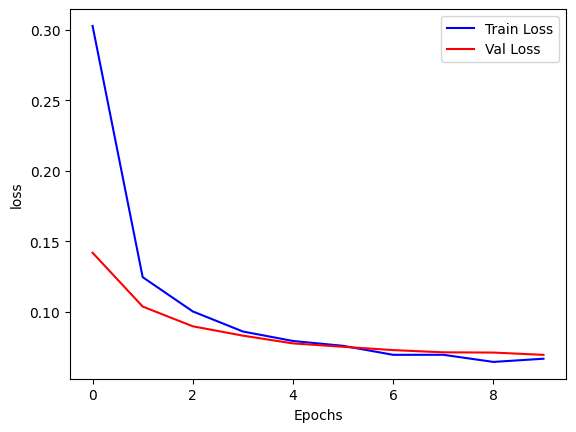

In [42]:
# Visualization of the training process on the loss function
plt.plot(history_bert_model.history["loss"], color="b", label="Train Loss")
plt.plot(history_bert_model.history["val_loss"], color="r", label="Val Loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

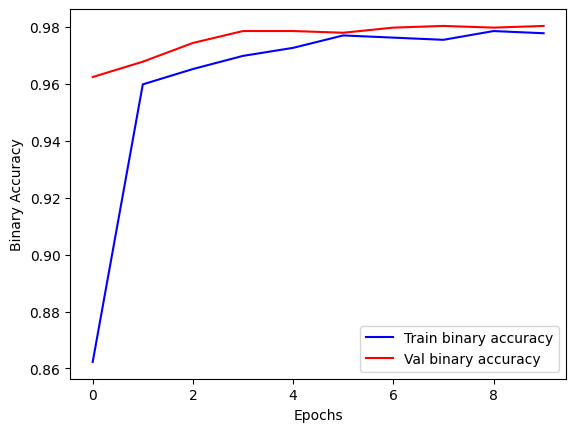

In [43]:
# Visualization of the training process on the accuracy
plt.plot(history_bert_model.history["binary_accuracy"], color="b", label="Train binary accuracy")
plt.plot(history_bert_model.history["val_binary_accuracy"], color="r", label="Val binary accuracy")
plt.ylabel("Binary Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

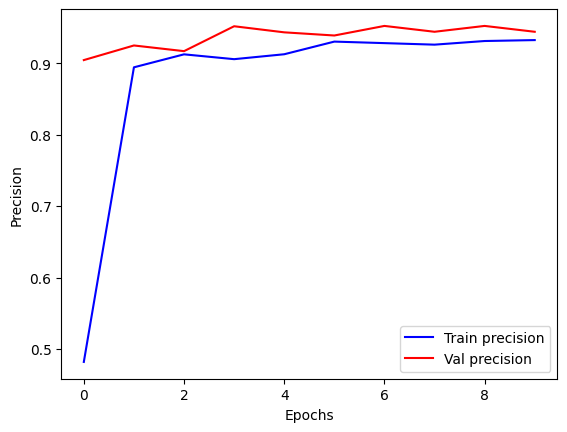

In [45]:
# Visualization of the training process on the precision
plt.plot(history_bert_model.history["precision_1"], color="b", label="Train precision")
plt.plot(history_bert_model.history["val_precision_1"], color="r", label="Val precision")
plt.ylabel("Precision")
plt.xlabel("Epochs")
plt.legend()
plt.show()

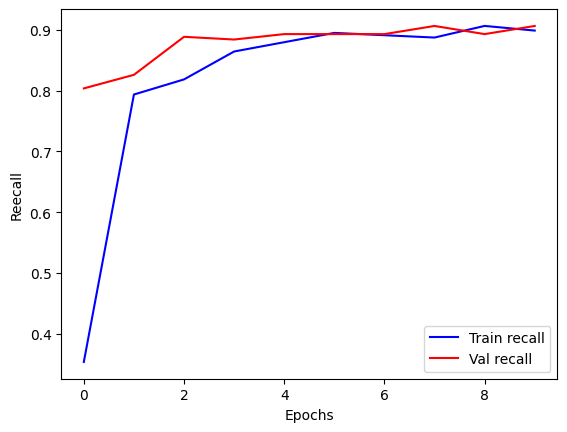

In [46]:
# Visualization of the training process on the recall
plt.plot(history_bert_model.history["recall_1"], color="b", label="Train recall")
plt.plot(history_bert_model.history["val_recall_1"], color="r", label="Val recall")
plt.ylabel("Reecall")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [49]:
print(f"Evaluation de la baseline {results}") #100 epochs
print(f"Evaluation de bert {results2}") #10 epochs

Evaluation de la baseline {'loss': 0.08636206388473511, 'binary_accuracy': 0.9820573925971985, 'recall': 0.8794642686843872, 'precision': 0.9850000143051147}
Evaluation de bert {'loss': 0.06937317550182343, 'binary_accuracy': 0.9802631735801697, 'recall_1': 0.90625, 'precision_1': 0.9441860318183899}


# Conclusion


Premier élément à prendre en compte, la baseline a été entrainé sur 100 epochs tandis que BERT sur 10 epochs
- La loss est plus basse sur BERT ce qui signifie qu'il fait un meilleur travail pour réduire l'écart entre les prédictions et les vrais labels pendant l'entrainement.
- L'accuracy est légèrement meilleure pour la baseline ce qui signifie qu'il fait un peu moins d'erreurs que BERT
- Le recall est meilleur pour BERT ce qui signifie qu'il est meilleur dans la capacité à détecter les TP
- La precision est légèrement meilleure pour la baseline ce qui signifie que parmi toutes les prédictions positives faites par la baseline, une plus grande proportion est correcte

Il faut regarder le F1 Score car Precision/Recall fonctionnent ensemble:
F1 Score = (Precision x Recall) / (Precision + Recall)

F1 Score Baseline = 0.928
F1 Score BERT = 0.925

Légèrement meilleur pour la baseline donc l'équilibre précision/rappel

Au vu des deux modèles on peut supposer que BERT serait plus performant sur 100 epochs mais nécessite beaucoup plus de puissances de calculs et de temps, donc d'argent.